In [14]:
import cv2
import matplotlib.pyplot as plt
import torch

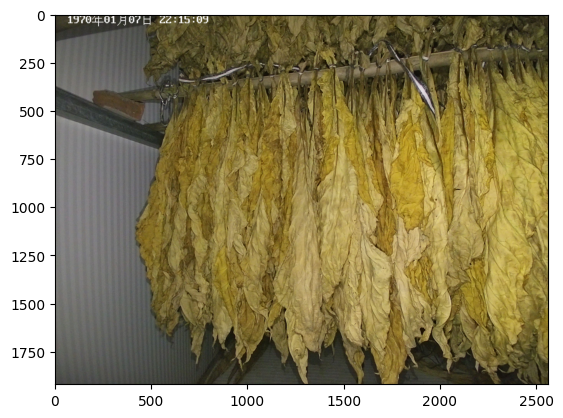

In [15]:
# filename = '/home/llj/code/test/data/20230611/000413_ch01.jpg'
filename = '/home/llj/code/test/data/20230617/091608_ch01.jpg'
img = cv2.imread(filename, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(img)
plt.show()

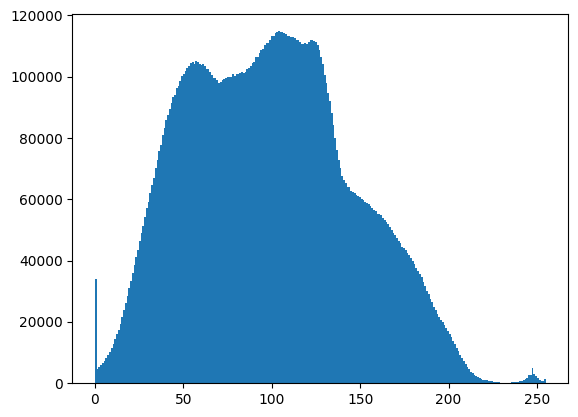

In [16]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(img.ravel(),256)
plt.show()

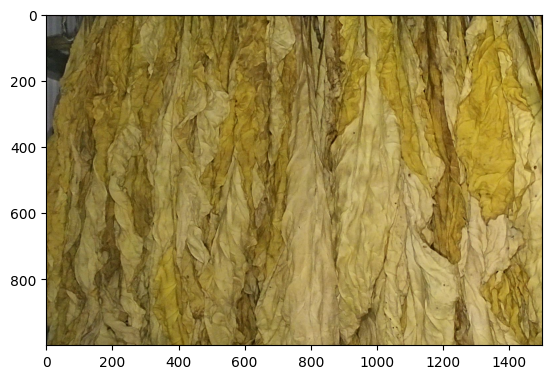

In [17]:
x = 500
y = 500
w = 1000
h = 1500
img = img[x:x + w, y:y + h]
plt.imshow(img)
plt.show()

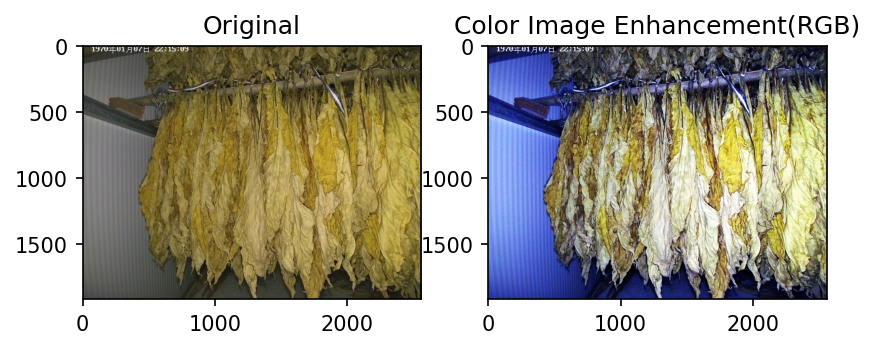

In [6]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def hist_ave_2(src):
    L=np.unique(src)
    cdf=(np.histogram(src.flatten(),L.size)[0]/src.size).cumsum()
    cdf=(cdf*L.max()+0.5)
    return np.interp(src.flatten(),L,cdf).reshape(src.shape)
img=np.array(Image.open("/home/llj/code/test/data/20230617/091608_ch01.jpg"))
img_co=img.copy()
i_r,i_g,i_b=img[:,:,0],img[:,:,1],img[:,:,2]
i_r=hist_ave_2(i_r)
i_g=hist_ave_2(i_g)
i_b=hist_ave_2(i_b)
img_co[:,:,0]=i_r
img_co[:,:,1]=i_g
img_co[:,:,2]=i_b
fig,(ax0,ax1)=plt.subplots(1,2)
fig.dpi=150
ax0.imshow(img)
ax0.set_title("Original")
ax1.imshow(img_co)
ax1.set_title("Color Image Enhancement(RGB)")
plt.show()

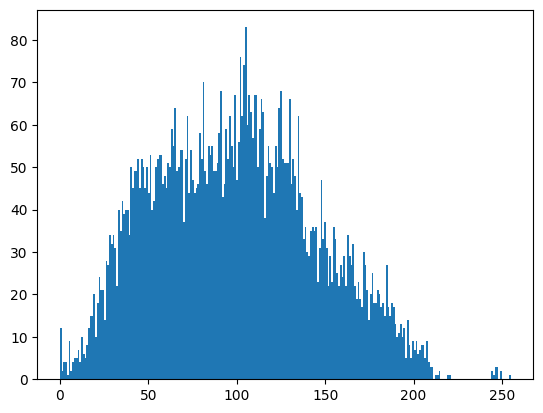

In [7]:
size = (50,50)
img = cv2.resize(img,size)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(img.ravel(),256)
plt.show()

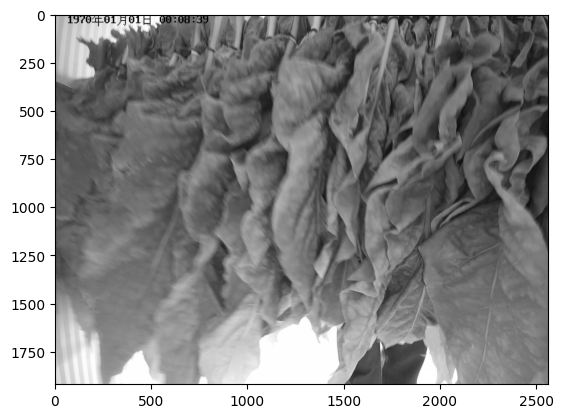

In [19]:
import cv2
import matplotlib.pyplot as plt
filename = '/home/llj/code/test/data/20230610/110917_ch01.jpg'
img = cv2.imread(filename, 1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#变成黑白
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(gray)
plt.show()

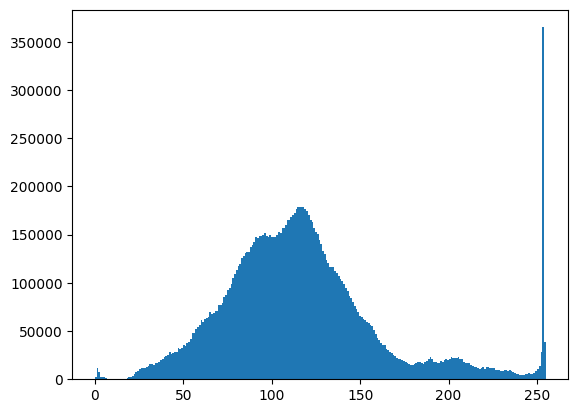

In [20]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

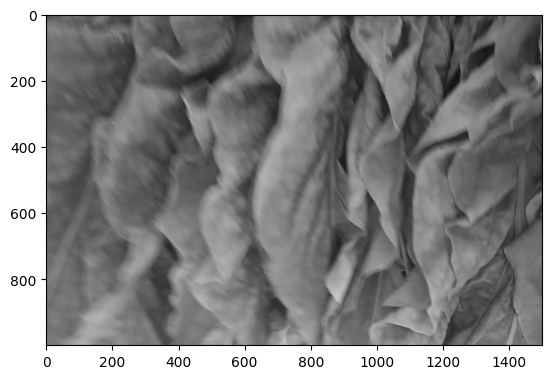

In [21]:
x = 500
y = 500
w = 1000
h = 1500
gray = gray[x:x + w, y:y + h]
plt.imshow(gray)
plt.show()

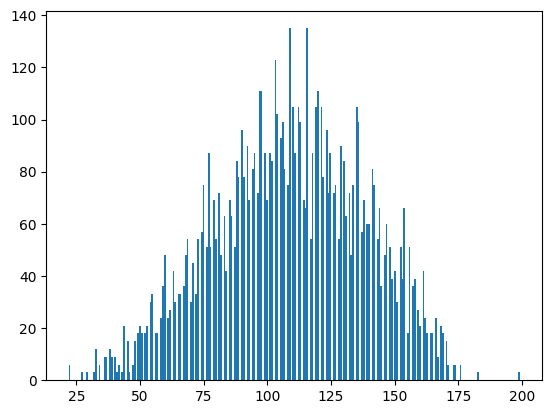

In [22]:
size = (50,50)
gray = cv2.resize(gray,size)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

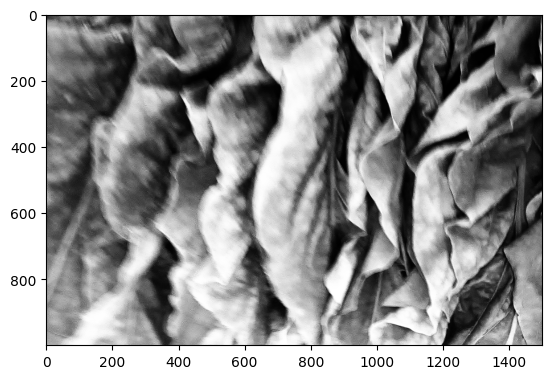

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#变成黑白
x = 500
y = 500
w = 1000
h = 1500
gray = gray[x:x + w, y:y + h]
gray = cv2.equalizeHist(gray)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(gray)
plt.show()

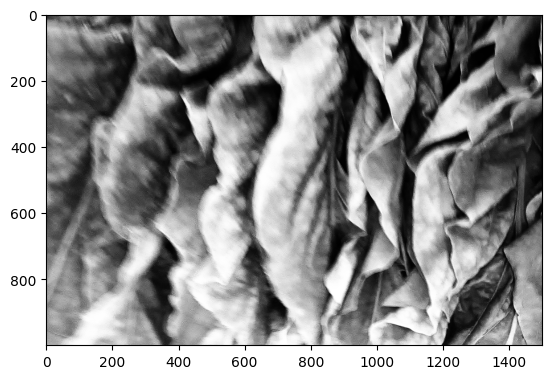

In [24]:
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)
plt.imshow(gray)
plt.show()
# cv2.imshow('color_image', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

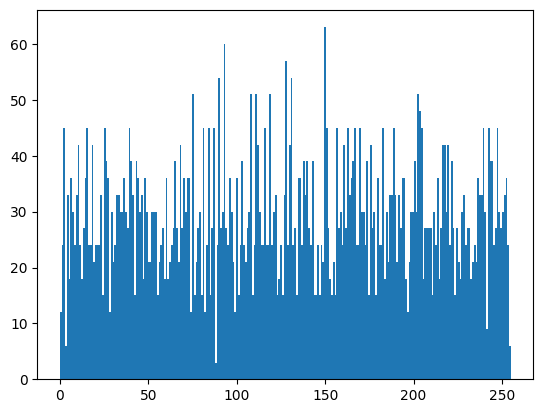

In [25]:
size = (50,50)
gray = cv2.resize(gray,size)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

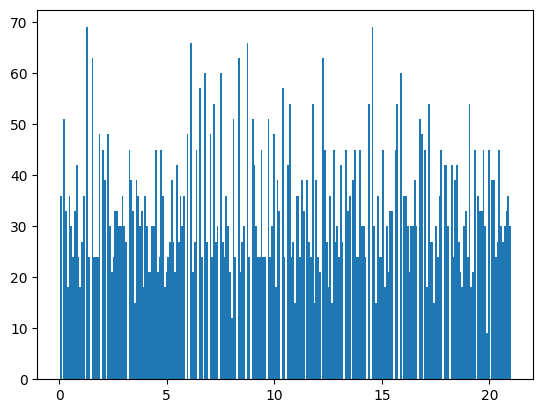

In [26]:
import numpy as np
# 计算累积分布函数
cdf = hist.cumsum()
# 计算均衡化后的像素值
cdf_normalized = cdf * hist.max() / cdf.max()

# 获取均衡化后的图像
equalized_image = np.interp(gray.flatten(), np.arange(256), cdf_normalized).reshape(gray.shape)

plt.hist(equalized_image.ravel(),256)
plt.show()

In [1]:
import torch
import numpy as np
x=torch.tensor([0.9801, 0.1800, 0.1400, 0.9600, 0.1800, 0.3100, 0.3200, 0.1300])
y=torch.tensor([0.8900, 0.2000, 0.1400, 0.9600, 0.1800, 0.3100, 0.3200, 0.1300])

In [35]:
x=x*100
x=x.numpy()
# y=y.numpy()
x=x.astype(int)
x

array([98, 18, 14, 96, 18, 31, 32, 13])

In [11]:
print(np.sum(x==y))

6


In [2]:
acc = torch.eq(x*100, y*100).float().cpu().mean()
print(acc)

tensor(0.7500)


In [3]:
import glob
import os
all_imgs_path = '/home/llj/code/test/data/20230610/110917_ch01.jpg'#数据文件夹路径
file_path, file_name = os.path.split(all_imgs_path)
parent_path, parent_name = os.path.split(file_path)
# print(parent_name,file_name)
time=(int(parent_name)-20230610)*24+int(file_name[:2])+int(file_name[2:4])/60
print(time)

11.15


In [9]:
import datetime
import time

a = '20220901' # 想被减的时间
a=a[:4]+'-'+a[4:6]+'-'+a[6:]
# print(a)
a_s = tuple(time.strptime(a,"%Y-%m-%d")) # 将格式化时间 转化为 结构化时间
print("时间1",a)

b = time.strftime("%Y-%m-%d") # 获取当前的格式化时间
print("时间2",b)
d1 = datetime.date(a_s[0], a_s[1], a_s[2])
d2 = datetime.date(int(b.split("-")[0]), int(b.split("-")[1]), int(b.split("-")[2]))
print('时间2 - 时间1 的天数是：',(d2 - d1).days)

时间1 2022-09-01
时间2 2023-11-12
时间2 - 时间1 的天数是： 437


In [3]:
import os
import datetime
import time
var = '/home/llj/code/test/data/20230610/110917_ch01.jpg'
file_path, file_name = os.path.split(var)
parent_path, parent_name = os.path.split(file_path)
# print(parent_name,file_name)
parent_name=parent_name[:4]+'-'+parent_name[4:6]+'-'+parent_name[6:]
a_s=tuple(time.strptime(parent_name, "%Y-%m-%d"))
d1 = datetime.date(a_s[0], a_s[1], a_s[2])
start = '20230610'
start = start[:4] + '-' + start[4:6] + '-' + start[6:]
s = tuple(time.strptime(start, "%Y-%m-%d"))
d2 = datetime.date(s[0], s[1], s[2])
times=(d2 - d1).days*24+int(file_name[:2])+int(file_name[2:4])/60
print(times)

11.15
